We will analyze the the inbuilt mushroom dataset to predict whether a mushroom is poisonous or not. We will use a Random Forest Model of machine learning for prediction which can be imported using FFTrees library. At the end of the analysis we can see a really commendable result(zero false negatives!). So let's begin:

In [2]:
library(FFTrees)
library(datasets)
library(randomForest)
library(ggplot2)
library(dplyr)

In [3]:
head(mushrooms)

poisonous,cshape,csurface,ccolor,bruises,odor,gattach,gspace,gsize,gcolor,...,ssbring,scaring,scbring,vtype,vcolor,ringnum,ringtype,sporepc,population,habitat
TRUE,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
FALSE,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
FALSE,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
TRUE,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
FALSE,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
FALSE,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


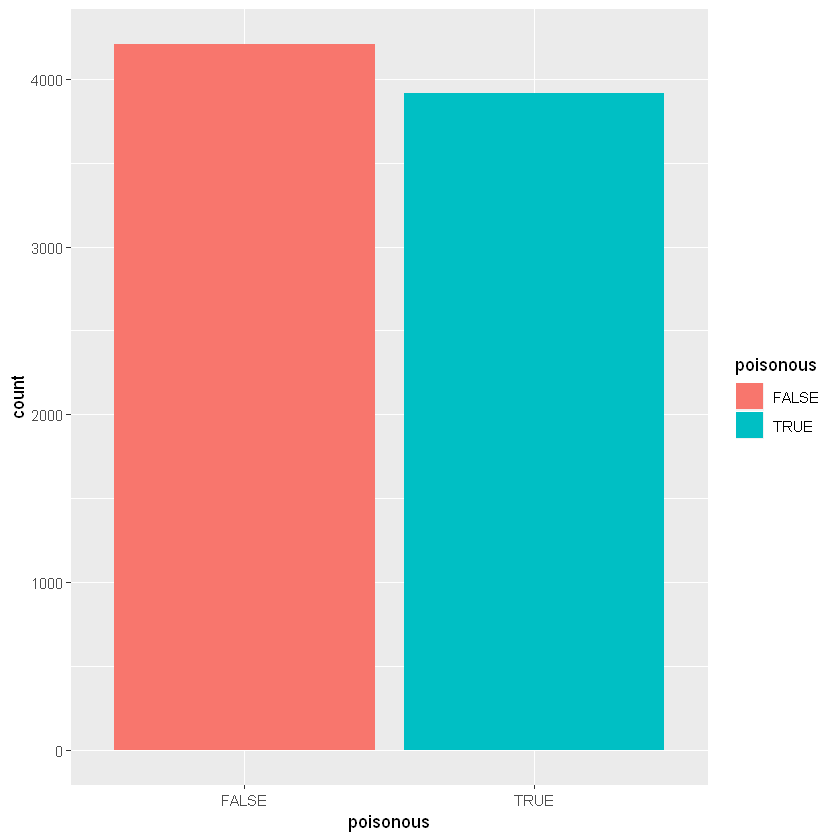

In [4]:
ggplot(mushrooms, aes(poisonous, fill = poisonous))+
  geom_bar()

In [5]:
nrow(mushrooms)

[1] 8124

In [6]:
# We need to split the dataset into training set(70 %) and test set(30 %)
rows <- sample(nrow(mushrooms), nrow(mushrooms) * 0.7, replace = FALSE)

train<- mushrooms[rows,]
test<-mushrooms[-rows,]

In [7]:
model <- FFTrees(poisonous ~ ., train)
model

Setting goal = 'wacc'
Setting goal.chase = 'waccc'
Setting cost.outcomes = list(hi = 0, mi = 1, fa = 1, cr = 0)
Growing FFTs with ifan
Fitting other algorithms for comparison (disable with do.comp = FALSE) ...


FFTrees 
- Trees: 6 fast-and-frugal trees predicting poisonous
- Outcome costs: [hi = 0, mi = 1, fa = 1, cr = 0]

FFT #1: Definition
[1] If odor = {f,y,s,p,c,m}, decide True.
[2] If sporepc != {h,w,r}, decide False, otherwise, decide True.

FFT #1: Training Accuracy
Training Data: N = 5,686, Pos (+) = 2,720 (47.8%) 

|         | True +   | True -   |
|---------|----------|----------|
|Decide + | hi 2,720 | fa 440   | 3,160
|Decide - | mi 0     | cr 2,526 | 2,526
|---------|----------|----------|
            2,720      2,966      N = 5,686

acc  = 92.3%  ppv  = 86.1%  npv  = 100.0%
bacc = 92.6%  sens = 100.0%  spec = 85.2%
E(cost) = 0.077

FFT #1: Training Speed and Frugality
mcu = 1.54, pci = 0.93

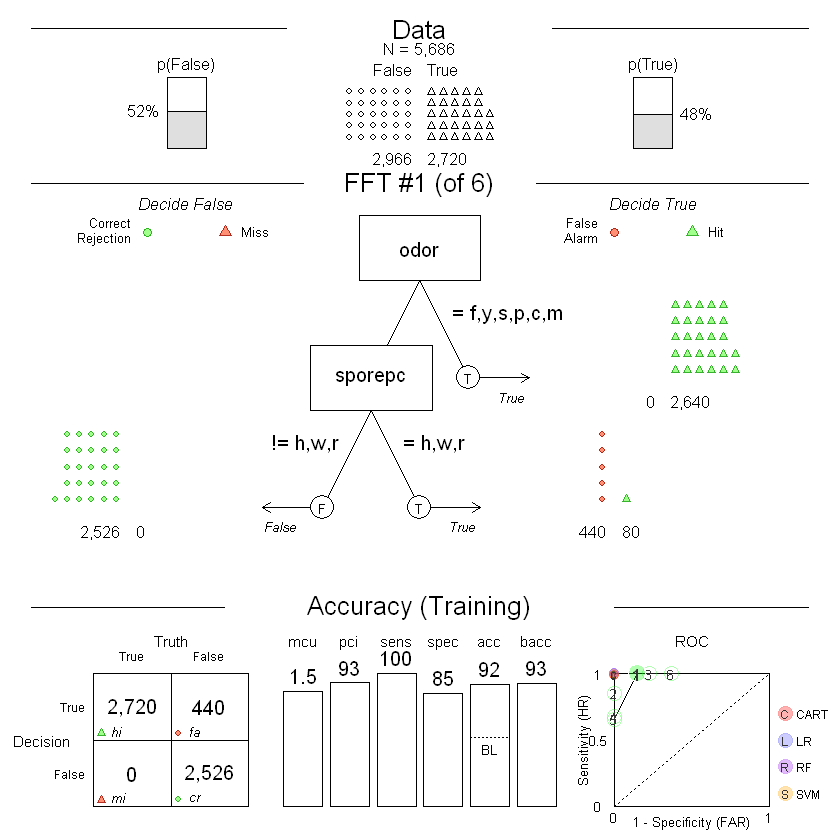

In [8]:
plot(model)

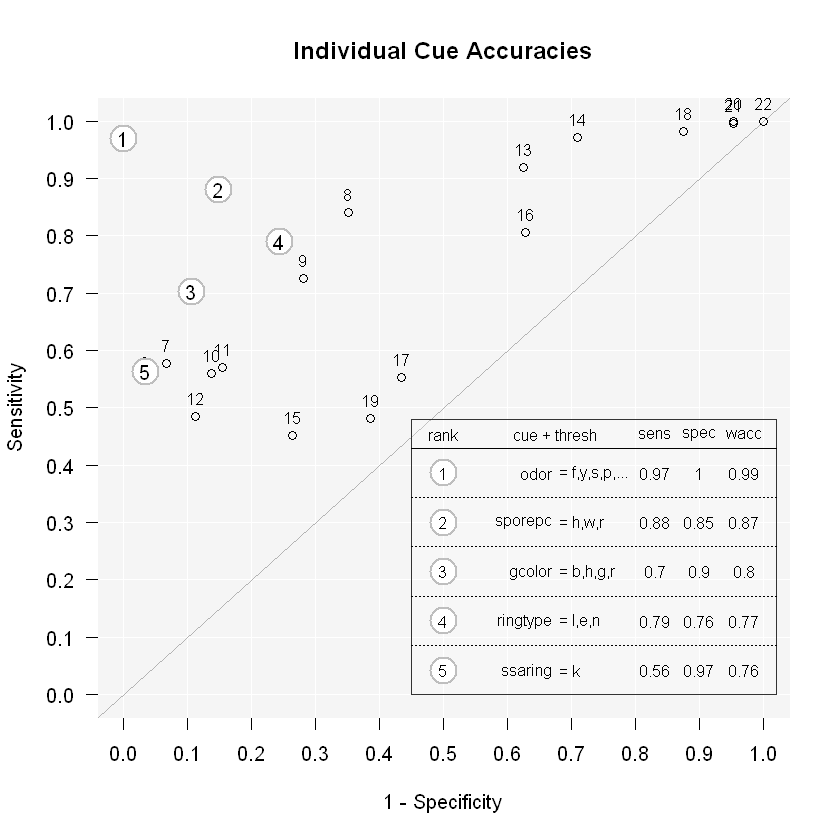

In [9]:
plot(model, what = "cues")

In [10]:
pred <- predict(model, test)
table(pred, test$poisonous)

       
pred    FALSE TRUE
  FALSE  1058    0
  TRUE    184 1196

`And voila! No False negatives. That's awesome right.